In [9]:
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [10]:
one_hotted = True
dataset_path = ".data/datasets/mily-data/Andi_dane"
predictions_path = ".data/predictions/mily-kernel=5-noise"

In [11]:
def load_data(suffix):
    y = np.load(os.path.join(dataset_path, f"y_{suffix}.npy"))
    preds = np.load(os.path.join(predictions_path, f"predictions_{suffix}.npy"))

    if one_hotted:
        y = np.argmax(y, axis=1)

    return y, preds

In [12]:
# Load labels and predictions
train_y, train_preds = load_data("train")
val_y, val_preds = load_data("val")
test_y, test_preds = load_data("test")

In [13]:
label_map = {0: 'attm', 1: 'ctrw', 2: 'fbm', 3: 'lw', 4: 'sbm'}

train_cmp = np.vectorize(label_map.get)(np.c_[train_y.astype(int), train_preds.astype(int)])
val_cmp = np.vectorize(label_map.get)(np.c_[val_y.astype(int), val_preds.astype(int)])
test_cmp = np.vectorize(label_map.get)(np.c_[test_y.astype(int), test_preds.astype(int)])

              precision    recall  f1-score   support

        attm       0.95      0.76      0.85      9803
        ctrw       0.96      0.98      0.97      9784
         fbm       0.86      0.88      0.87      9827
          lw       0.95      0.99      0.97      9819
         sbm       0.82      0.91      0.86      9767

    accuracy                           0.91     49000
   macro avg       0.91      0.91      0.90     49000
weighted avg       0.91      0.91      0.90     49000



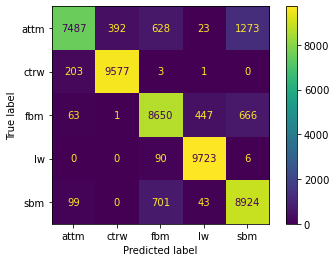

In [14]:
print(classification_report(*train_cmp.T))
disp = ConfusionMatrixDisplay.from_predictions(*train_cmp.T)

              precision    recall  f1-score   support

        attm       0.76      0.58      0.66      4201
        ctrw       0.87      0.91      0.89      4193
         fbm       0.77      0.75      0.76      4212
          lw       0.93      0.98      0.95      4208
         sbm       0.67      0.79      0.73      4186

    accuracy                           0.80     21000
   macro avg       0.80      0.80      0.80     21000
weighted avg       0.80      0.80      0.80     21000



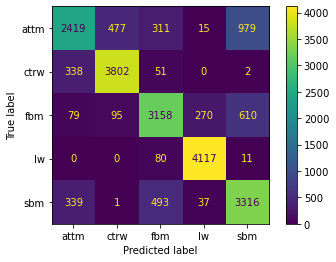

In [15]:
print(classification_report(*val_cmp.T))
disp = ConfusionMatrixDisplay.from_predictions(*val_cmp.T)

              precision    recall  f1-score   support

        attm       0.76      0.56      0.65      6002
        ctrw       0.86      0.90      0.88      5990
         fbm       0.76      0.75      0.75      6017
          lw       0.93      0.98      0.96      6011
         sbm       0.67      0.79      0.72      5980

    accuracy                           0.80     30000
   macro avg       0.80      0.80      0.79     30000
weighted avg       0.80      0.80      0.79     30000



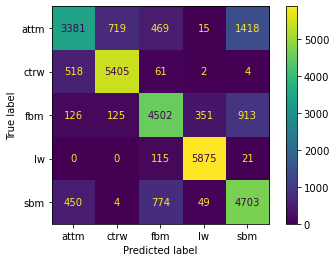

In [16]:
print(classification_report(*test_cmp.T))
disp = ConfusionMatrixDisplay.from_predictions(*test_cmp.T)